In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ast
from scipy.optimize import curve_fit
import math

In [2]:
# # Load the 2D array from the CSV file and the masks
load_data = np.loadtxt("data/normalized_data.csv", delimiter=",")
load_mask = np.loadtxt("data/cleaning_mask.csv", delimiter=",")
voltages = np.loadtxt("data/voltages-4K.csv", delimiter=",")
voltage_mask = np.loadtxt("data/voltage_mask.csv", delimiter=",")
 
# Reshape the 2D array back to its original 3D shape
loaded_data = load_data.reshape(310,2,140)
loaded_mask = load_mask.reshape(310,2,140)

In [3]:
# add the masks to the data
clean_data = np.ma.masked_array(loaded_data, loaded_mask)
print(len(clean_data))

clean_voltages = np.ma.masked_array(voltages, voltage_mask)
print(len(clean_voltages))

310
310


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


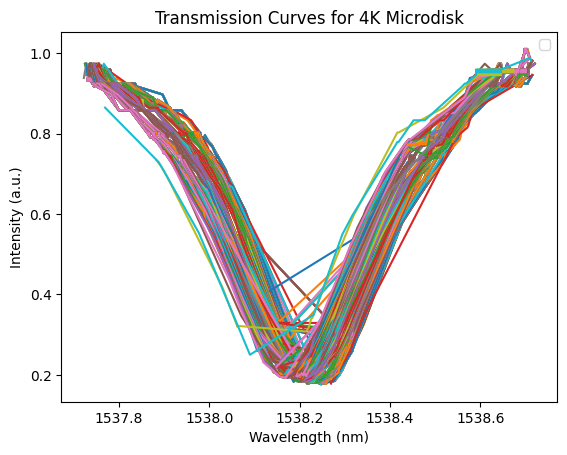

In [4]:
#lets regraph again

for i in range(len(clean_data)):
    plt.plot(clean_data[i][0], clean_data[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.savefig("figures/Gehl-4K-Curves.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140


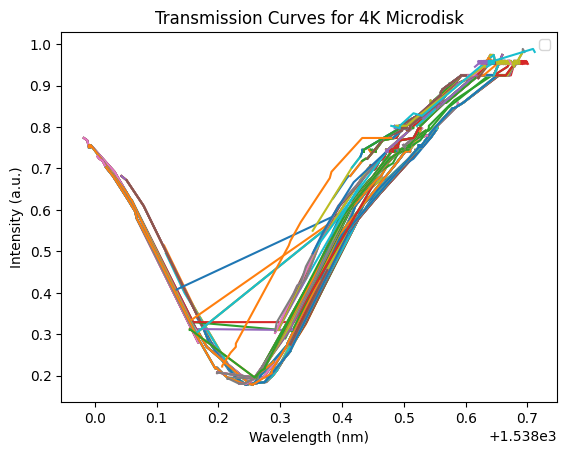

In [5]:
#lets regraph again


for i in range(len(clean_data)):
    last = 75
    plt.plot(clean_data[i][0][first:last], clean_data[i][1][first:last])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.savefig("figures/Gehl-4K-Curves.png")
plt.show()

In [6]:
#its beautiful
#now we fit

#function for transmission in an all pass ring

def Tsymthru(wavelength, neff, round_trip_loss_field, r, radius):
    phase=4*math.pi**2*radius*neff/wavelength
    #round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
    Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
    Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
    return Numer/Denom

In [7]:
# #recreate a function to try and mitigate the r values taking over

# def Tsymthru(wavelength, neff, round_trip_loss_field, r, radius):
#     phase=4*math.pi**2*radius*neff/wavelength
#     #round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
#     Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
#     Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
#     return Numer/Denom

In [8]:
n = 2
first = 60
last = 75

def Guess(wavelength,neff, abscoef_power):
    return Tsymthru(wavelength, neff, abscoef_power, 0.9905, 1.75e-6) #1.75 not 10
x = np.ma.masked_array(clean_data[n][0][first:last])
y = np.ma.masked_array(clean_data[n][1][first:last])
mini = np.argmin(y)
print(mini)
print(y[mini])

3
0.1928650153752036


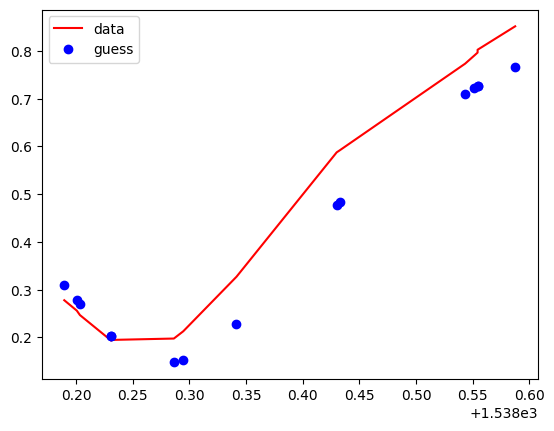

In [9]:
#276 = 2.5180, 723
#2 = 
new_x = np.linspace(1537, 1539.5, 49)
ans = Guess(x*1e-9,2.5182, 0.99575)



plt.plot(x, y, 'r-', label='data')
plt.plot(x, ans, 'o', color ='blue', label ="guess")
plt.legend()
plt.savefig("fitdata.png")
plt.show()

In [10]:
fit_params_arr=np.zeros([len(y)+1,2])
fit_params_arr[0]=[2.5182, 0.9959]
for i in range(len(y)):
    fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x[~x.mask]*1e-9, y[~y.mask],p0=fit_params_arr[i])
    fit_params_arr[i+1]=fit_params_arr[i]
fit_params_arr=fit_params_arr[:-1]


In [11]:
fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
print(fit_params_arr[12])

[2.51815517 0.99622372]


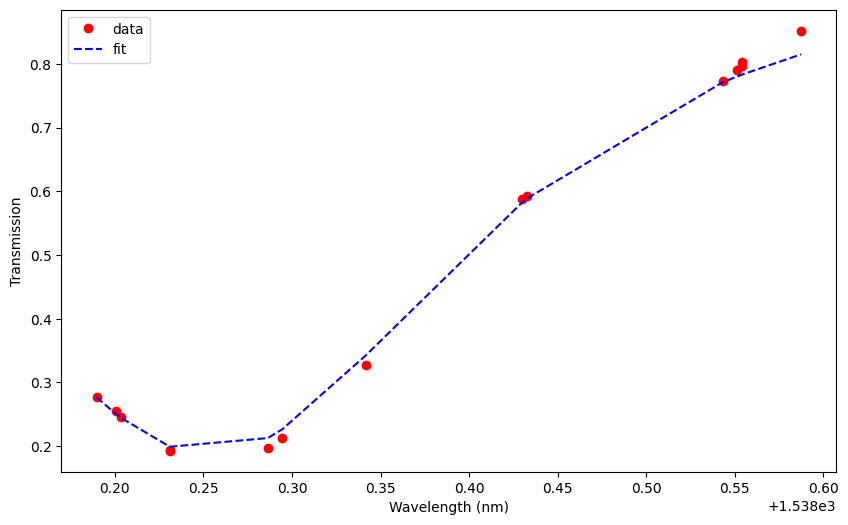

In [12]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', color ='red', label ="data")
plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
#plt.title('Cryogenic Forward Bias Curve')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')

plt.legend()
plt.show()

In [13]:
length = len(clean_data)
print(clean_voltages.mask)

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  T

In [14]:
#print(y)
print(y[~y.mask])

[0.27753513577533956 0.2557608704792177 0.2464365209960359
 0.1928650153752036 0.194302891103117 0.19721088206928733
 0.21241683818229998 0.3268027589410064 0.5876576904403714
 0.5920388827875788 0.7735337420742316 0.7909639355175085
 0.7968608465893428 0.8028017211829352 0.8519512540886495]


In [15]:
# so getting there for one
# now I have a general idea of where we're going
# i just need to do it like 260 more times

fits = []

def Guess(wavelength,neff):
    return Tsymthru(wavelength, neff, 0.996, 0.9905, 1.75e-6)

neff = np.zeros((len(clean_voltages)))
neff_guess = 2.51819078

for n in range(0, length):
    
    line = []
    line.append(clean_data[n][0])

    x = np.ma.masked_array(clean_data[n][0])
    y = np.ma.masked_array(clean_data[n][1])
    
    fit_params_arr=np.zeros([len(y)+1,1])
    #fit_params_arr[0]=[neff[n], alph[n]]
    fit_params_arr[0]=[neff_guess]
    
    if clean_voltages.mask[n] == False:
        print("Guess is ", fit_params_arr[0])
        for i in range(len(y)):
            fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x[~x.mask]*1e-9, y[~y.mask],p0=fit_params_arr[i])
            fit_params_arr[i+1]=fit_params_arr[i]
        fit_params_arr=fit_params_arr[:-1]

        neff_guess = fit_params_arr[12][0]
        neff[n] = neff_guess    #grab a number from near the middle
        #alph.append(fit_params_arr[12][1])
        
        print(fit_params_arr[12])
        #fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
        fit_ans = Guess(x*1e-9,fit_params_arr[:,0])
        trans = fit_ans.tolist()
        line.append(trans)
        print(len(trans))
        fits.append(line)

    #plt.figure(figsize=(10,6))
    #plt.plot(x, y, 'o', color ='red', label = f'{n}')
    #plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
    #plt.xlabel('Wavelength (nm)')
    #plt.ylabel('Transmission')
    #plt.legend()
    #plt.show()
    


Guess is  [2.51819078]
[2.51817608]
140
Guess is  [2.51817608]
[2.51817761]
140
Guess is  [2.51817761]
[2.51817574]
140
Guess is  [2.51817574]
[2.51817931]
140
Guess is  [2.51817931]
[2.51817649]
140
Guess is  [2.51817649]
[2.51817865]
140
Guess is  [2.51817865]
[2.51817774]
140
Guess is  [2.51817774]
[2.51817481]
140
Guess is  [2.51817481]
[2.51817524]
140
Guess is  [2.51817524]
[2.5181754]
140
Guess is  [2.5181754]
[2.51818197]
140
Guess is  [2.51818197]
[2.51818197]
140
Guess is  [2.51818197]
[2.51818197]
140
Guess is  [2.51818197]
[2.51818197]
140
Guess is  [2.51818197]
[2.51818131]
140
Guess is  [2.51818131]
[2.51817531]
140
Guess is  [2.51817531]
[2.51817531]
140
Guess is  [2.51817531]
[2.51817531]
140
Guess is  [2.51817531]
[2.51817531]
140
Guess is  [2.51817531]
[2.51817531]
140
Guess is  [2.51817531]
[2.51817647]
140
Guess is  [2.51817647]
[2.51817647]
140
Guess is  [2.51817647]
[2.51817647]
140
Guess is  [2.51817647]
[2.51817647]
140
Guess is  [2.51817647]
[2.51817647]
140
Gu

In [16]:
print(neff[276])

2.5180319353243794


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


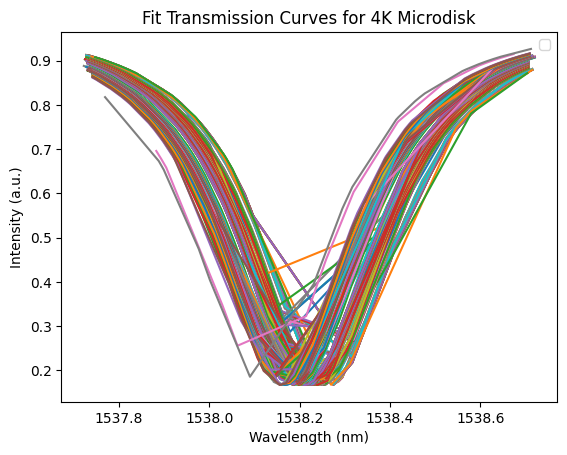

In [17]:
#so this fit looks quite good
# it could use some r variation tho so lets see if we can do that using the neff values as the set point

for i in range(len(fits)):
    plt.plot(fits[i][0], fits[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Fit Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
#plt.savefig("Gehl-4K-Curves.png")
plt.show()


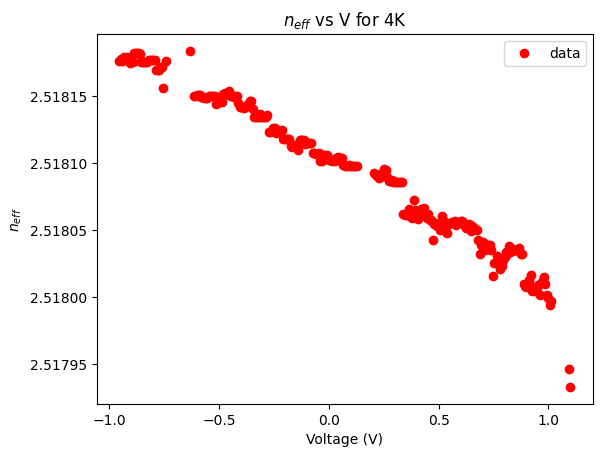

In [18]:

plt.plot(clean_voltages  , neff,  'o', color ='red', label ="data")
plt.title('$n_{eff}$ vs V for 4K')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Voltage (V)')
plt.ylabel('$n_{eff}$')
#plt.savefig("Gehl-4K-Neff.png",bbox_inches='tight')
plt.legend()
plt.show()

In [19]:
# now lets try again with r

fits_r = []
j = 0

r = np.zeros((len(clean_voltages)))
r_guess = 0.99

for n in range(0, length):
    
    def Guess(wavelength,r_guess):
        return Tsymthru(wavelength, neff[n], 0.99, r_guess, 1.75e-6)

    line = []
    line.append(clean_data[n][0])

    x = np.ma.masked_array(clean_data[n][0])
    y = np.ma.masked_array(clean_data[n][1])
    
    fit_params_arr=np.zeros([len(y)+1,1])
    #fit_params_arr[0]=[neff[n], alph[n]]
    fit_params_arr[0]=[r_guess]
    
    if clean_voltages.mask[n] == False:
        print("Guess is ", fit_params_arr[0])
        for i in range(len(y)):
            fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x[~x.mask]*1e-9, y[~y.mask],p0=fit_params_arr[i])
            fit_params_arr[i+1]=fit_params_arr[i]
        fit_params_arr=fit_params_arr[:-1]

        r_guess = fit_params_arr[12][0]
        r[n] = r_guess    #grab a number from near the middle
        #alph.append(fit_params_arr[12][1])
        
        print(fit_params_arr[12])
        #fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
        fit_ans = Guess(x*1e-9,fit_params_arr[:,0])
        trans = fit_ans.tolist()
        line.append(trans)
        fits_r.append(line)

    #plt.figure(figsize=(10,6))
    #plt.plot(x, y, 'o', color ='red', label = f'{n}')
    #plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
    #plt.xlabel('Wavelength (nm)')
    #plt.ylabel('Transmission')
    #plt.legend()
    #plt.show()
    


Guess is  [0.99]
[0.99670092]
Guess is  [0.99670092]
[0.99672615]
Guess is  [0.99672615]
[0.99672316]
Guess is  [0.99672316]
[0.9967372]
Guess is  [0.9967372]
[0.99677879]
Guess is  [0.99677879]
[0.99679487]
Guess is  [0.99679487]
[0.99676093]
Guess is  [0.99676093]


C:\Users\madel\AppData\Local\Temp\ipykernel_53608\2268850473.py:7: RuntimeWarning: divide by zero encountered in divide
  phase=4*math.pi**2*radius*neff/wavelength


[0.99676114]
Guess is  [0.99676114]
[0.99672713]
Guess is  [0.99672713]
[0.99665958]
Guess is  [0.99665958]
[0.99663841]
Guess is  [0.99663841]
[0.99663841]
Guess is  [0.99663841]
[0.99663841]
Guess is  [0.99663841]
[0.99663841]
Guess is  [0.99663841]
[0.99664148]
Guess is  [0.99664148]
[0.9966598]
Guess is  [0.9966598]
[0.9966598]
Guess is  [0.9966598]
[0.9966598]
Guess is  [0.9966598]
[0.9966598]
Guess is  [0.9966598]
[0.9966598]
Guess is  [0.9966598]
[0.9970238]
Guess is  [0.9970238]
[0.9970238]
Guess is  [0.9970238]
[0.9970238]
Guess is  [0.9970238]
[0.9970238]
Guess is  [0.9970238]
[0.9970238]
Guess is  [0.9970238]
[0.9969508]
Guess is  [0.9969508]
[0.9969508]
Guess is  [0.9969508]
[0.9969508]
Guess is  [0.9969508]
[0.99696698]
Guess is  [0.99696698]
[0.99696698]
Guess is  [0.99696698]
[0.99650323]
Guess is  [0.99650323]
[0.99648053]
Guess is  [0.99648053]
[0.996706]
Guess is  [0.996706]
[0.99663841]
Guess is  [0.99663841]
[0.99663841]
Guess is  [0.99663841]
[0.99664967]
Guess is 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


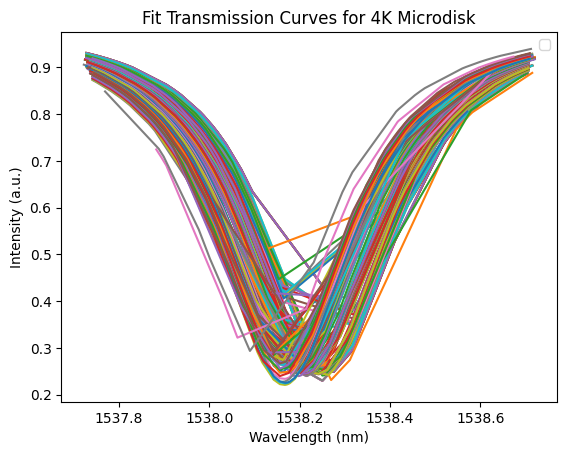

In [20]:

for i in range(len(fits_r)):
    plt.plot(fits_r[i][0], fits_r[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Fit Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
#plt.savefig("Gehl-4K-Curves.png")
plt.show()

In [21]:
# now lets try again with alpha

fits2 = []

alph = np.zeros((len(clean_voltages)))
alph_guess = 0.99

for n in range(0, length):
    
    def Guess(wavelength,alpha_coeff):
        return Tsymthru(wavelength, neff[n], alpha_coeff, 0.9905, 1.75e-6)

    line = []
    line.append(clean_data[n][0])

    x = np.ma.masked_array(clean_data[n][0])
    y = np.ma.masked_array(clean_data[n][1])
    
    fit_params_arr=np.zeros([len(y)+1,1])
    #fit_params_arr[0]=[neff[n], alph[n]]
    fit_params_arr[0]=[alph_guess]
    
    if clean_voltages.mask[n] == False:
        print("Guess is ", fit_params_arr[0])
        for i in range(len(y)):
            fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x[~x.mask]*1e-9, y[~y.mask],p0=fit_params_arr[i]) #, bounds=((720,760)))
            fit_params_arr[i+1]=fit_params_arr[i]
        fit_params_arr=fit_params_arr[:-1]

        alph_guess = fit_params_arr[12][0]
        alph[n] = alph_guess    #grab a number from near the middle
        #alph.append(fit_params_arr[12][1])
        
        print(fit_params_arr[12])
        #fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
        fit_ans = Guess(x*1e-9,fit_params_arr[:,0])
        trans = fit_ans.tolist()
        line.append(trans)
        fits2.append(line)

    #plt.figure(figsize=(10,6))
    #plt.plot(x, y, 'o', color ='red', label = f'{n}')
    #plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
    #plt.xlabel('Wavelength (nm)')
    #plt.ylabel('Transmission')
    #plt.legend()
    #plt.show()
    


Guess is  [0.99]
[0.99667887]
Guess is  [0.99667887]
[0.99670339]
Guess is  [0.99670339]
[0.99670125]
Guess is  [0.99670125]
[0.99670955]
Guess is  [0.99670955]
[0.99676848]
Guess is  [0.99676848]
[0.99677182]
Guess is  [0.99677182]
[0.99673698]
Guess is  [0.99673698]


C:\Users\madel\AppData\Local\Temp\ipykernel_53608\2268850473.py:7: RuntimeWarning: divide by zero encountered in divide
  phase=4*math.pi**2*radius*neff/wavelength


[0.99673878]
Guess is  [0.99673878]
[0.99670655]
Guess is  [0.99670655]
[0.99663498]
Guess is  [0.99663498]
[0.99661921]
Guess is  [0.99661921]
[0.99661921]
Guess is  [0.99661921]
[0.99661921]
Guess is  [0.99661921]
[0.99661921]
Guess is  [0.99661921]
[0.99662373]
Guess is  [0.99662373]
[0.99663892]
Guess is  [0.99663892]
[0.99663892]
Guess is  [0.99663892]
[0.99663892]
Guess is  [0.99663892]
[0.99663892]
Guess is  [0.99663892]
[0.99663892]
Guess is  [0.99663892]
[0.99695469]
Guess is  [0.99695469]
[0.99695469]
Guess is  [0.99695469]
[0.99695469]
Guess is  [0.99695469]
[0.99695469]
Guess is  [0.99695469]
[0.99695469]
Guess is  [0.99695469]
[0.99688773]
Guess is  [0.99688773]
[0.99688773]
Guess is  [0.99688773]
[0.99688773]
Guess is  [0.99688773]
[0.99690056]
Guess is  [0.99690056]
[0.99690056]
Guess is  [0.99690056]
[0.99645943]
Guess is  [0.99645943]
[0.99652254]
Guess is  [0.99652254]
[0.99666106]
Guess is  [0.99666106]
[0.9966142]
Guess is  [0.9966142]
[0.9966142]
Guess is  [0.99661

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


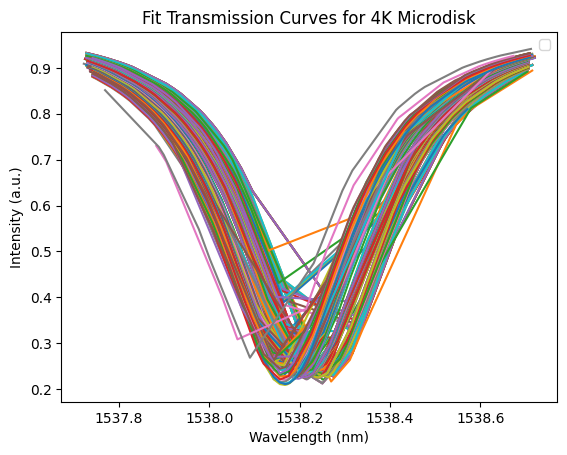

In [22]:
for i in range(len(fits2)):
    plt.plot(fits2[i][0], fits2[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Fit Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
#plt.savefig("Gehl-4K-Curves.png")
plt.show()

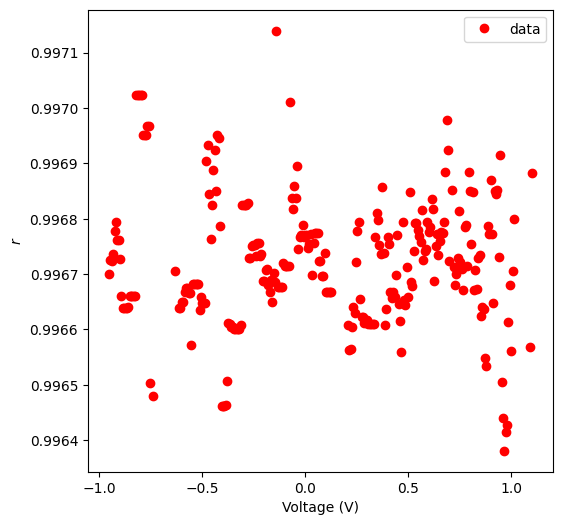

In [23]:
plt.figure(figsize=(6,6))
plt.plot(clean_voltages  , r,  'o', color ='red', label ="data")
#plt.title('Cryogenic Forward Bias Curve')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Voltage (V)')
plt.ylabel('$r$')

plt.legend()
plt.show()

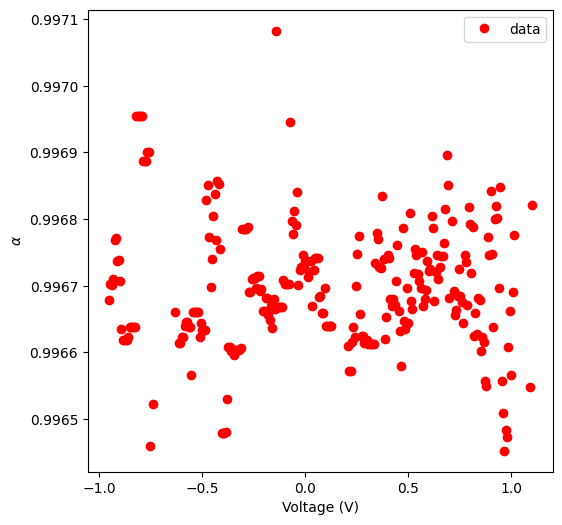

In [24]:
plt.figure(figsize=(6,6))
plt.plot(clean_voltages  , alph,  'o', color ='red', label ="data")
#plt.title('Cryogenic Forward Bias Curve')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Voltage (V)')
plt.ylabel('$\\alpha$')

plt.legend()
plt.show()

In [25]:
print(fits_r)

[[masked_array(data=[1537.7282872928174, 1537.7282872928174,
                   1537.742099447513, 1537.742099447513,
                   1537.7448618784522, 1537.7448618784522,
                   1537.7476243093913, 1537.7476243093913,
                   1537.7503867403304, 1537.7503867403304,
                   1537.7531491712696, 1537.7531491712696,
                   1537.7559116022087, 1537.7559116022087,
                   1537.7586740331478, 1537.7586740331478,
                   1537.761436464087, 1537.761436464087,
                   1537.764198895026, 1537.764198895026,
                   1537.7669613259652, 1537.7669613259652,
                   1537.7780110497217, 1537.7780110497217,
                   1537.7807734806609, 1537.7807734806609,
                   1537.7918232044174, 1537.7945856353565,
                   1537.8001104972348, 1537.8028729281739,
                   1537.805635359113, 1537.8083977900521,
                   1537.8111602209913, 1537.8139226519304,
  

In [26]:
# minimum_y = []
# minimum_x = []


# masked_fits = np.ma.array(fits_r)
# masked_fits = np.ma.masked_where(masked_fits == None, masked_fits) #masks all values that are 0

# print(masked_fits[~masked_fits.mask][1])

# for n in range(len(masked_fits)):
#     if clean_voltages.mask[n] == False:
#         mini_y = np.ma.argmin(masked_fits[n][1])
#         minimum_y.append(masked_fits[n][1][mini_y])
#         minimum_x.append(masked_fits[n][0][mini_y])

# plt.plot(minimum_x, minimum_y, 'o')
# plt.show()